In [142]:
import pandas as pd

In [143]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [144]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


### Feature Engineering

#### title

In [145]:
train['title'].unique()

array(['Toyota RAV 4', 'Toyota Land Cruiser',
       'Land Rover Range Rover Evoque', 'Lexus ES 350', 'Toyota Venza',
       'Toyota Corolla', 'Land Rover Range Rover Sport', 'Pontiac Vibe',
       'Toyota Tacoma', 'Lexus RX 350', 'Ford Escape', 'Honda Civic',
       'Volvo XC90', 'BMW 750', 'Infiniti JX', 'Honda Accord',
       'Mercedes-Benz ML 350', 'Toyota Camry', 'Hyundai Azera',
       'Lexus GX 460', 'BMW 325', 'Toyota Sienna', 'Honda Fit',
       'Honda CR-V', 'Hyundai Tucson', 'Ford Transit', 'Jaguar XJ8',
       'BMW X6', 'Mercedes-Benz C 300', 'Mitsubishi Galant',
       'Mercedes-Benz GL 450', 'Lexus RX 300', 'Toyota Highlander',
       'Mitsubishi CANTER PICK UP', 'Nissan Titan', 'Lexus IS 250',
       'Mercedes-Benz 200', 'Toyota Sequoia', 'Ford Explorer',
       'Hyundai ix35', 'Mack CH613 CONVENTIONAL CAB', 'Lexus CT 200h',
       'Lexus LX 570', 'Toyota Avensis', 'Toyota 4-Runner',
       'Mercedes-Benz GLE 350', 'Mercedes-Benz E 300', 'Toyota Avalon',
       'Chevrole

odometer-주행거리\
isimported-수입여부

In [146]:
comp=[]
for i in range(len(train)):
    comp.append(train['title'][i].split()[0])
train['comp']=comp
print(train['comp'].unique())

['Toyota' 'Land' 'Lexus' 'Pontiac' 'Ford' 'Honda' 'Volvo' 'BMW' 'Infiniti'
 'Mercedes-Benz' 'Hyundai' 'Jaguar' 'Mitsubishi' 'Nissan' 'Mack'
 'Chevrolet' 'Mazda' 'Lincoln' 'Kia' 'Volkswagen' 'Acura' 'DAF' 'Man'
 'Isuzu' 'IVM' 'Porsche' 'MINI' 'Dodge' 'GMC' 'Iveco' 'Scania' 'GAC'
 'IVECO' 'Peugeot' 'Rolls-Royce' 'MAN-VOLKSWAGEN' 'Jeep' 'ALPINA'
 'Bentley' 'JMC' 'Mercedes-Benz/52' 'Audi']


In [147]:
#Mercedes-Benz/52 /52제거
print(train[train['comp']=='Mercedes-Benz/52']['comp'])
train['comp'].iloc[827]='Mercedes-Benz'
print(train['comp'].unique())

827    Mercedes-Benz/52
Name: comp, dtype: object
['Toyota' 'Land' 'Lexus' 'Pontiac' 'Ford' 'Honda' 'Volvo' 'BMW' 'Infiniti'
 'Mercedes-Benz' 'Hyundai' 'Jaguar' 'Mitsubishi' 'Nissan' 'Mack'
 'Chevrolet' 'Mazda' 'Lincoln' 'Kia' 'Volkswagen' 'Acura' 'DAF' 'Man'
 'Isuzu' 'IVM' 'Porsche' 'MINI' 'Dodge' 'GMC' 'Iveco' 'Scania' 'GAC'
 'IVECO' 'Peugeot' 'Rolls-Royce' 'MAN-VOLKSWAGEN' 'Jeep' 'ALPINA'
 'Bentley' 'JMC' 'Audi']


C:\Users\tnqls\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [148]:
comp=[]
for i in range(len(test)):
    comp.append(test['title'][i].split()[0])
test['comp']=comp

In [149]:
test['comp'].unique()

array(['Mercedes-Benz', 'Honda', 'Toyota', 'Iveco', 'Lexus', 'Nissan',
       'Volkswagen', 'Jeep', 'Ford', 'BMW', 'Mack', 'Land', 'Hyundai',
       'Peugeot', 'Volvo', 'Infiniti', 'Acura', 'Man', 'Fiat', 'MINI',
       'DAF', 'Mazda', 'Porsche', 'Mitsubishi', 'Chevrolet', 'Kia',
       'Pontiac', 'Rolls-Royce'], dtype=object)

#### odometer

(array([530., 354.,  92.,  19.,   4.,   4.,   4.,   5.,   2.,   1.]),
 array([     0. ,  98732.2, 197464.4, 296196.6, 394928.8, 493661. ,
        592393.2, 691125.4, 789857.6, 888589.8, 987322. ]),
 <a list of 10 Patch objects>)

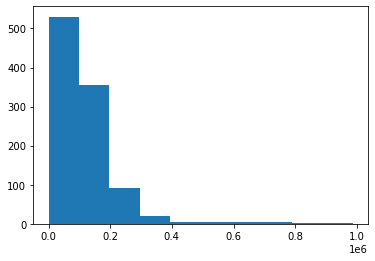

In [150]:
import matplotlib.pyplot as plt
plt.hist(train['odometer']) #한쪽으로 치우쳐져 있음

{'whiskers': [<matplotlib.lines.Line2D at 0x258d595ab20>,
 'caps': [<matplotlib.lines.Line2D at 0x258d5966250>,
 'boxes': [<matplotlib.lines.Line2D at 0x258d595a7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x258d5966910>],
 'fliers': [<matplotlib.lines.Line2D at 0x258d5966c10>],
 'means': []}

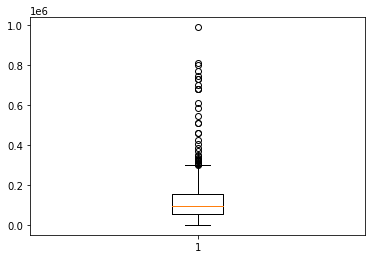

In [151]:
plt.boxplot(train['odometer']) #이상치가 많음.

In [152]:
IQR=abs(train['odometer'].quantile(0.75)-train['odometer'].quantile(0.25))
print('큰 이상치:',len(train[train['odometer']>(train['odometer'].quantile(0.75)+(1.5*IQR))]))
print('작은 이상치:',len(train[train['odometer']<(train['odometer'].quantile(0.25)-(1.5*IQR))]))
#제거대상

큰 이상치: 37
작은 이상치: 0


In [153]:
train=train[train['odometer']<(train['odometer'].quantile(0.75)+(1.5*IQR))]

In [154]:
max(train['odometer'])

297333

(array([145., 126., 195., 162., 116.,  88.,  73.,  38.,  21.,  14.]),
 array([     0. ,  29733.3,  59466.6,  89199.9, 118933.2, 148666.5,
        178399.8, 208133.1, 237866.4, 267599.7, 297333. ]),
 <a list of 10 Patch objects>)

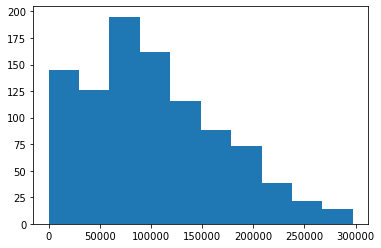

In [155]:
plt.hist(train['odometer']) #덜치우쳐보임

In [156]:
train.describe()

,id,odometer,year,target
count,978.000000,978.000000,978.000000,9.780000e+02
mean,508.229039,102486.519427,2010.197342,8.308666e+06
std,292.583251,66616.912421,5.341071,1.239202e+07
min,0.000000,0.000000,1982.000000,4.000000e+05
25%,258.250000,54404.500000,2007.000000,2.621250e+06
50%,508.500000,92424.000000,2010.000000,4.317500e+06
75%,760.750000,145218.500000,2014.000000,8.940000e+06
max,1014.000000,297333.000000,2020.000000,1.500150e+08


In [157]:
# 구간 나누는 지점 설정
bins = list([0, 66616, 92424, 145218, 297334])
# 구간 이름
bins_label = [1,2,3,4,5]
train["odometer_level"] = pd.cut(train["odometer"], bins, right=False, labels=bins_label[:-1])
test["odometer_level"] = pd.cut(test["odometer"], bins, right=False, labels=bins_label[:-1])

In [158]:
del train ['odometer']
del test ['odometer']

#### location

In [159]:
train['location'].unique()

array(['Lagos ', 'Lagos', 'Abuja', 'Lagos State', 'Ogun', 'FCT', 'Accra',
       'other', 'Abuja ', 'Abia State', 'Adamawa ', 'Abia', 'Ogun State'],
      dtype=object)

In [160]:
test['location'].unique()

array(['Abuja', 'Lagos', 'Lagos ', 'Ogun', 'Mushin', 'Lagos State',
       'other', 'Abuja ', 'Arepo ogun state ', 'Ogun State', 'Abia'],
      dtype=object)

In [161]:
train['location'].unique() #Lagos에서 띄어쓰기 제거해주기
train.replace('Lagos ','Lagos',inplace=True)
train.replace('Abuja ','Abuja',inplace=True)
train.replace('Lagos State','Lagos',inplace=True)
train.replace('Abuja State','Abuja',inplace=True)
train.replace('Abia State','Abia',inplace=True)
train.replace('Ogun State','Ogun',inplace=True)

In [162]:
test['location'].unique() #Lagos띄어쓰기, Abuja띄어쓰기
test.replace('Lagos ','Lagos',inplace=True)
test.replace('Abuja ','Abuja',inplace=True)
test.replace('Lagos State','Lagos',inplace=True)
test.replace('Abuja State','Abuja',inplace=True)
test.replace('Ogun State','Ogun',inplace=True)
test.replace('Arepo ogun state ','Ogun',inplace=True)
test.replace('Mushin','other',inplace=True) #하나 있길래 그냥 other로

In [163]:
print('train:',train['location'].unique())
print('test:',test['location'].unique())

train: ['Lagos' 'Abuja' 'Ogun' 'FCT' 'Accra' 'other' 'Abia' 'Adamawa ']
test: ['Abuja' 'Lagos' 'Ogun' 'other' 'Abia']


<BarContainer object of 8 artists>

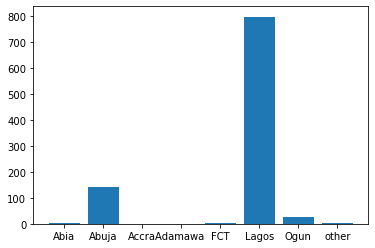

In [164]:
lo=train.groupby(train['location'])['id'].count()
plt.bar(lo.index,lo)

<BarContainer object of 7 artists>

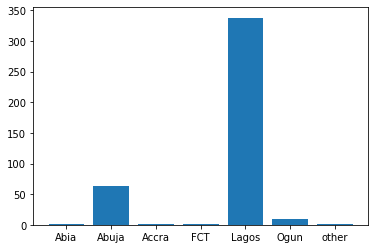

In [165]:
lo=test.groupby(train['location'])['id'].count()
plt.bar(lo.index,lo)

#### isimported

<BarContainer object of 3 artists>

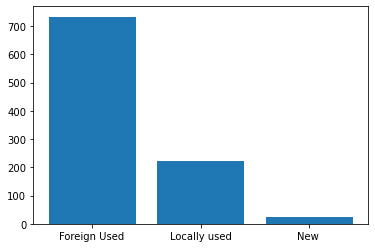

In [166]:
im=train.groupby(train['isimported'])['id'].count()
plt.bar(im.index,im)

<BarContainer object of 3 artists>

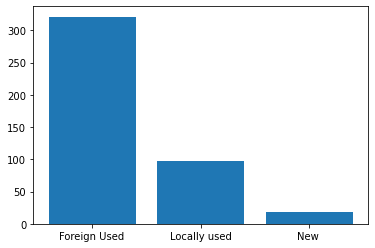

In [167]:
im=test.groupby(test['isimported'])['id'].count()
plt.bar(im.index,im)

#### engine

In [168]:
print('train:',train['engine'].unique())
print('test:',test['engine'].unique())

train: ['4-cylinder(I4)' '6-cylinder(V6)' '8-cylinder(V8)' '6-cylinder(I6)'
 '4-cylinder(H4)' '5-cylinder(I5)' '3-cylinder(I3)' '2-cylinder(I2)']
test: ['4-cylinder(I4)' '6-cylinder(V6)' '6-cylinder(I6)' '8-cylinder(V8)'
 '5-cylinder(I5)' '2-cylinder(I2)' '12-cylinder(V12)' '3-cylinder(I3)']


#### transmission 변속기

In [169]:
print(train['transmission'].unique())
print(test['transmission'].unique())

['automatic' 'manual']
['automatic' 'manual']


#### fua;

In [170]:
print(train['fuel'].unique())
print(test['fuel'].unique())

['petrol' 'diesel']
['petrol' 'diesel']


#### paint

In [171]:
print(train['paint'].unique())
print(test['paint'].unique())

['Red' 'Black' 'Gray' 'White' 'Blue' 'Redl' 'Silver' ' Black/Red'
 'Deep Blue' 'Dark Grey' 'Brown' 'Grey' 'Green' 'Purple' 'Gold'
 'Dark Blue' 'Milk' 'Midnight Black Metal' 'green' 'Beige' 'Blue '
 'Silver ' 'Dark Ash' 'Black ' 'orange' 'Cream' 'blue' 'white' 'Dark gray'
 'White orchild pearl' 'red' 'Dark Green' 'Yellow' 'Sliver' 'White '
 'Wine' 'white-blue' 'Magnetic Gray' 'WHITE' 'yellow' 'Gray '
 'Dark silver ' 'Dark blue ' 'Gold ' 'SILVER' 'Black.' 'WINE'
 'Silver/grey' 'Ink blue' 'Light blue' 'Sky blue' 'Gery' 'Pale brown'
 'Whine ' 'Cream ' 'Black and silver' 'DARK GREY' 'Grey ' 'Dark ash'
 'Light silver ' 'BLACK' 'GOLD' 'Black sand pearl' 'Off white' 'Ash'
 'Maroon' 'Navy blue' 'Super White' ' Black' 'Ash and black' 'Green '
 'Magnetic Gray Metallic' 'Skye blue' 'Off white l']
['White' 'Black' 'Dark Grey' 'Red' 'Silver' 'white' 'Blue' 'Gray' 'Grey'
 'Gold' 'Green' 'Silver ' 'Sliver ' 'Gold ' 'Black ' 'Cream' 'Brown'
 'black' 'Yellow' 'Cream ' 'Dark Green' 'White and green' 'Gre

In [172]:
for i in range(len(train)):
    train['paint'].iloc[i]=train['paint'].iloc[i].rstrip() 
    train['paint'].iloc[i]=train['paint'].iloc[i].lstrip() 
    train['paint'].iloc[i]=train['paint'].iloc[i].lower() 
for i in range(len(test)):
    test['paint'].iloc[i]=test['paint'].iloc[i].rstrip() 
    test['paint'].iloc[i]=test['paint'].iloc[i].lstrip() 
    test['paint'].iloc[i]=test['paint'].iloc[i].lower() 

C:\Users\tnqls\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [173]:
a=train['paint'].unique()
b=test['paint'].unique()
for i in b:
    if i not in a:
        print(i)

white and green
light grey
blac
golf
indigo ink pearl
grey and black
classic silver met(1f7)
mint green


In [174]:
test['paint'].replace('white and green','white',inplace=True)
test['paint'].replace('light grey','grey',inplace=True)
test['paint'].replace('blac','black',inplace=True)
test['paint'].replace('golf','gold',inplace=True)
test['paint'].replace('indigo ink pearl','ink blue',inplace=True)
test['paint'].replace('grey and black','grey',inplace=True)
test['paint'].replace('classic silver met(1f7)','silver',inplace=True)
test['paint'].replace('mint green','green',inplace=True)

In [175]:
a=train['paint'].unique()
b=test['paint'].unique()
for i in b:
    if i not in a:
        print(i)

In [176]:
train['paint'].replace('grey','gray',inplace=True)
train['paint'].replace('redl','red',inplace=True)
train['paint'].replace('gery','gray',inplace=True)
train['paint'].replace('skye blue','sky blue',inplace=True)
train['paint'].replace('maroon','wine',inplace=True)
train['paint'].replace('whine','wine',inplace=True)
train['paint'].replace('off white l','white',inplace=True)
test['paint'].replace('grey','gray',inplace=True)
test['paint'].replace('redl','red',inplace=True)
test['paint'].replace('gery','gray',inplace=True)
test['paint'].replace('skye blue','sky blue',inplace=True)
test['paint'].replace('maroon','wine',inplace=True)
test['paint'].replace('whine','wine',inplace=True)
test['paint'].replace('off white l','white',inplace=True)

In [177]:
test['paint'].replace('grey','gray',inplace=True)
test['paint'].replace('redl','red',inplace=True)
test['paint'].replace('gery','gray',inplace=True)
test['paint'].replace('skye blue','sky blue',inplace=True)
test['paint'].replace('maroon','wine',inplace=True)
test['paint'].replace('whine','wine',inplace=True)
test['paint'].replace('off white l','white',inplace=True)

In [178]:
train['paint'].unique()

array(['red', 'black', 'gray', 'white', 'blue', 'silver', 'black/red',
       'deep blue', 'dark grey', 'brown', 'green', 'purple', 'gold',
       'dark blue', 'milk', 'midnight black metal', 'beige', 'dark ash',
       'orange', 'cream', 'dark gray', 'white orchild pearl',
       'dark green', 'yellow', 'sliver', 'wine', 'white-blue',
       'magnetic gray', 'dark silver', 'black.', 'silver/grey',
       'ink blue', 'light blue', 'sky blue', 'pale brown',
       'black and silver', 'light silver', 'black sand pearl',
       'off white', 'ash', 'navy blue', 'super white', 'ash and black',
       'magnetic gray metallic'], dtype=object)

#### target

(array([858.,  74.,  18.,  19.,   5.,   0.,   0.,   3.,   0.,   1.]),
 array([4.00000000e+05, 1.53615008e+07, 3.03230016e+07, 4.52845024e+07,
        6.02460032e+07, 7.52075040e+07, 9.01690048e+07, 1.05130506e+08,
        1.20092006e+08, 1.35053507e+08, 1.50015008e+08]),
 <a list of 10 Patch objects>)

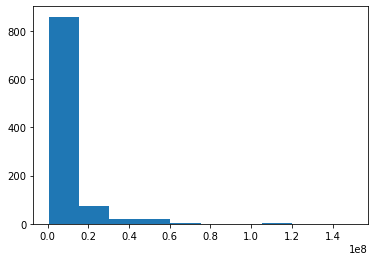

In [179]:
import matplotlib.pyplot as plt
plt.hist(train['target']) #한쪽으로 치우쳐져 있음

{'whiskers': [<matplotlib.lines.Line2D at 0x258d5c128e0>,
 'caps': [<matplotlib.lines.Line2D at 0x258d5c12fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x258d5c12580>],
 'medians': [<matplotlib.lines.Line2D at 0x258d5c1b6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258d5c1b9d0>],
 'means': []}

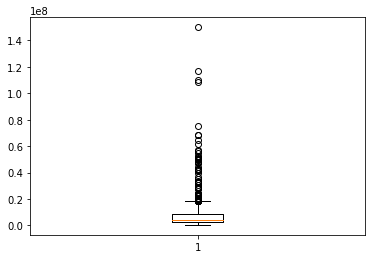

In [180]:
plt.boxplot(train['target'])

In [181]:
IQR=abs(train['target'].quantile(0.75)-train['target'].quantile(0.25))
print('큰 이상치:',len(train[train['target']>(train['target'].quantile(0.75)+(1.5*IQR))]))
print('작은 이상치:',len(train[train['target']<(train['target'].quantile(0.25)-(1.5*IQR))]))
#제거대상

큰 이상치: 84
작은 이상치: 0


In [182]:
train=train[train['target']<(train['target'].quantile(0.75)+(1.5*IQR))]

In [183]:
train.to_csv('train1.csv',index=False)
test.to_csv('test1.csv',index=False)

In [184]:
train

,id,title,location,isimported,engine,transmission,fuel,paint,year,target,comp,odometer_level
0,0,Toyota RAV 4,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota,1
2,2,Land Rover Range Rover Evoque,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land,2
3,3,Lexus ES 350,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,gray,2007,3815000,Lexus,2
4,4,Toyota Venza,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota,3
5,5,Toyota Corolla,Abuja,Locally used,4-cylinder(I4),automatic,petrol,white,2004,1465000,Toyota,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,Toyota Corolla,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2014,5415000,Toyota,1
1011,1011,Toyota Camry,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,silver,2011,3615000,Toyota,1
1012,1012,Toyota Camry,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,black,2011,3415000,Toyota,3
1013,1013,Lexus GX 460,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,gold,2013,14315000,Lexus,4
